<a href="https://colab.research.google.com/github/abaskon/Thesis/blob/main/GPR_and_DBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [39]:
dbi1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI1985-2004.csv")
dbi2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI2004-today.csv")

In [40]:
gpr1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_daily_recent.csv")
gpr2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_export.csv")

gpr1['GPRD'] = gpr1['GPRD'].str.replace(',', '').astype(float)

In [41]:
dbi1['Price'] = dbi1['Price'].str.replace(',', '').astype(float)
dbi2['Price'] = dbi2['Price'].str.replace(',', '').astype(float)

In [42]:
dbi1['Date'] = pd.to_datetime(dbi1['Date'], format='%m/%d/%Y')
dbi2['Date'] = pd.to_datetime(dbi2['Date'], format='%m/%d/%Y')

In [43]:
gpr1['DAY'] = gpr1['DAY'].astype(str)
# Convert the 'Date' column to datetime format
gpr1['DAY'] = pd.to_datetime(gpr1['DAY'], format='%Y%m%d')

# Convert the 'Date' column to the '%m/%d/%Y' format
gpr1['DAY'] = gpr1['DAY'].dt.strftime('%Y-%m-%d')


In [44]:
dbi1

,Date,Price,Open,High,Low,Vol.,Change %
0,2004-11-22,5442.0,"5,442.00","5,442.00","5,442.00",NaN,0.91%
1,2004-11-19,5393.0,"5,393.00","5,393.00","5,393.00",NaN,1.09%
2,2004-11-18,5335.0,"5,335.00","5,335.00","5,335.00",NaN,1.35%
3,2004-11-17,5264.0,"5,264.00","5,264.00","5,264.00",NaN,1.41%
4,2004-11-16,5191.0,"5,191.00","5,191.00","5,191.00",NaN,0.76%
...,...,...,...,...,...,...,...
4994,1985-01-11,980.5,980.50,980.50,980.50,NaN,0.10%
4995,1985-01-10,979.5,979.50,979.50,979.50,NaN,-1.51%
4996,1985-01-09,994.5,994.50,994.50,994.50,NaN,-0.20%
4997,1985-01-08,996.5,996.50,996.50,996.50,NaN,-0.20%


In [45]:
gpr1

,DAY,N10D,GPRD,GPRD_ACT,GPRD_THREAT,date,GPRD_MA30,GPRD_MA7,event,var_name,var_label
0,1985-01-01,216,230.04,275.20,153.03,01-01-1985,230.04,230.04,NaN,DAY,DAY
1,1985-01-02,315,115.68,146.77,87.44,02-01-1985,172.86,172.86,NaN,N10D,"Number of articles (10 recent newspapers, 1985-)"
2,1985-01-03,374,97.43,158.94,29.46,03-01-1985,147.71,147.71,NaN,GPRD,Daily GPR (Index: 1985:2019=100)
3,1985-01-04,421,157.37,156.88,157.03,04-01-1985,150.13,150.13,NaN,GPRD_ACT,Daily GPR Acts (Index: 1985:2019=100)
4,1985-01-05,285,81.36,92.70,77.32,05-01-1985,136.37,136.37,NaN,GPRD_THREAT,Daily GPR Threats (Index: 1985:2019=100)
...,...,...,...,...,...,...,...,...,...,...,...
13988,2023-04-20,470,98.67,126.47,70.33,20-04-2023,93.04,98.11,NaN,NaN,NaN
13989,2023-04-21,453,117.00,102.06,121.61,21-04-2023,92.90,98.72,NaN,NaN,NaN
13990,2023-04-22,522,63.46,101.22,31.66,22-04-2023,91.56,95.33,NaN,NaN,NaN
13991,2023-04-23,355,55.99,93.02,31.04,23-04-2023,90.75,97.36,NaN,NaN,NaN


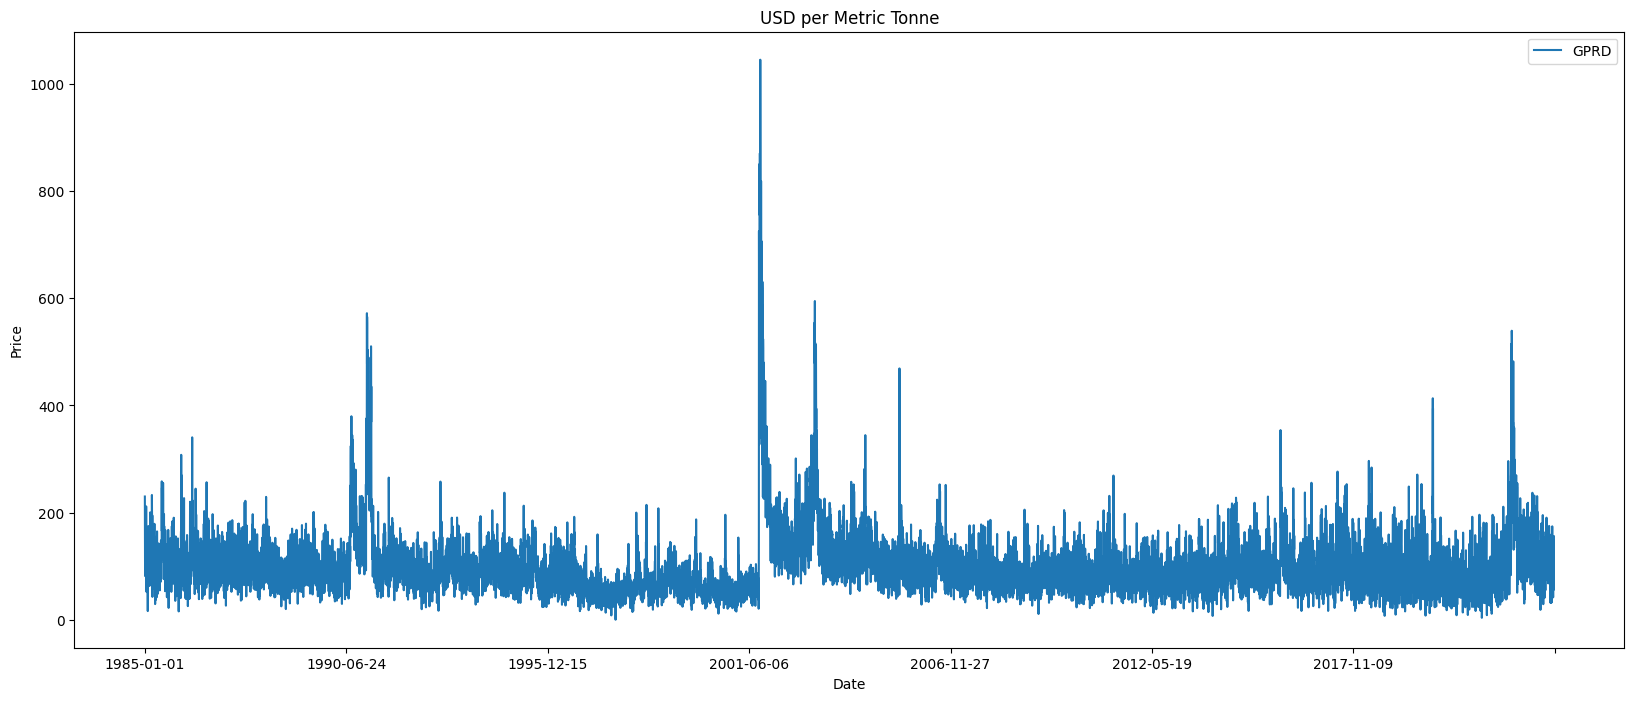

In [46]:
plotgraph(gpr1,'DAY','GPRD')

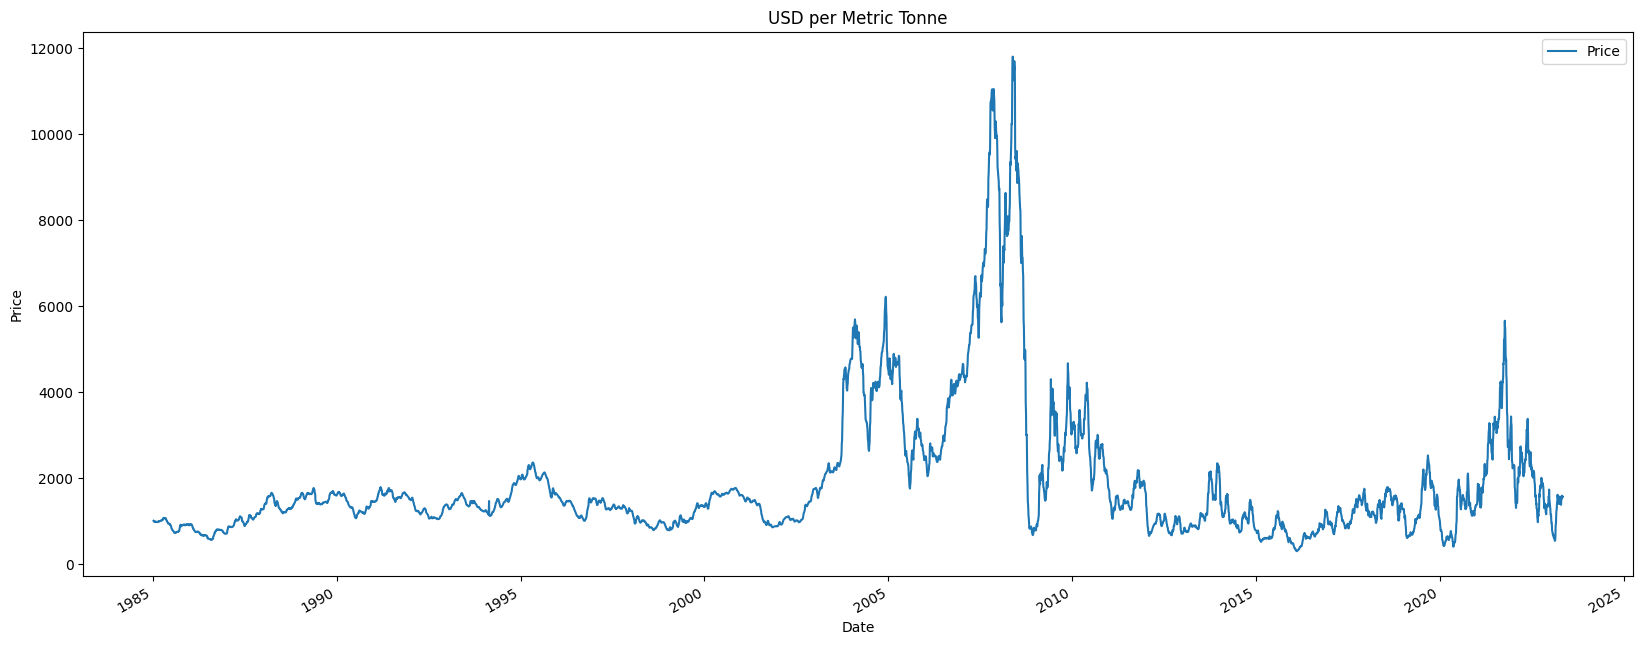

In [47]:
def plotgraph(df, x, y):
    df[y] = pd.to_numeric(df[y])
    df.plot(x=x, y=y, figsize=(20, 8))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('USD per Metric Tonne')
    plt.show()
plotgraph(DBI,'Date','Price')

In [48]:
# concatenate the two tables based on the 'date' column
DBI = pd.concat([dbi1, dbi2]).drop_duplicates(subset='Date')
DBI = DBI.sort_values(by='Date', ascending=False)

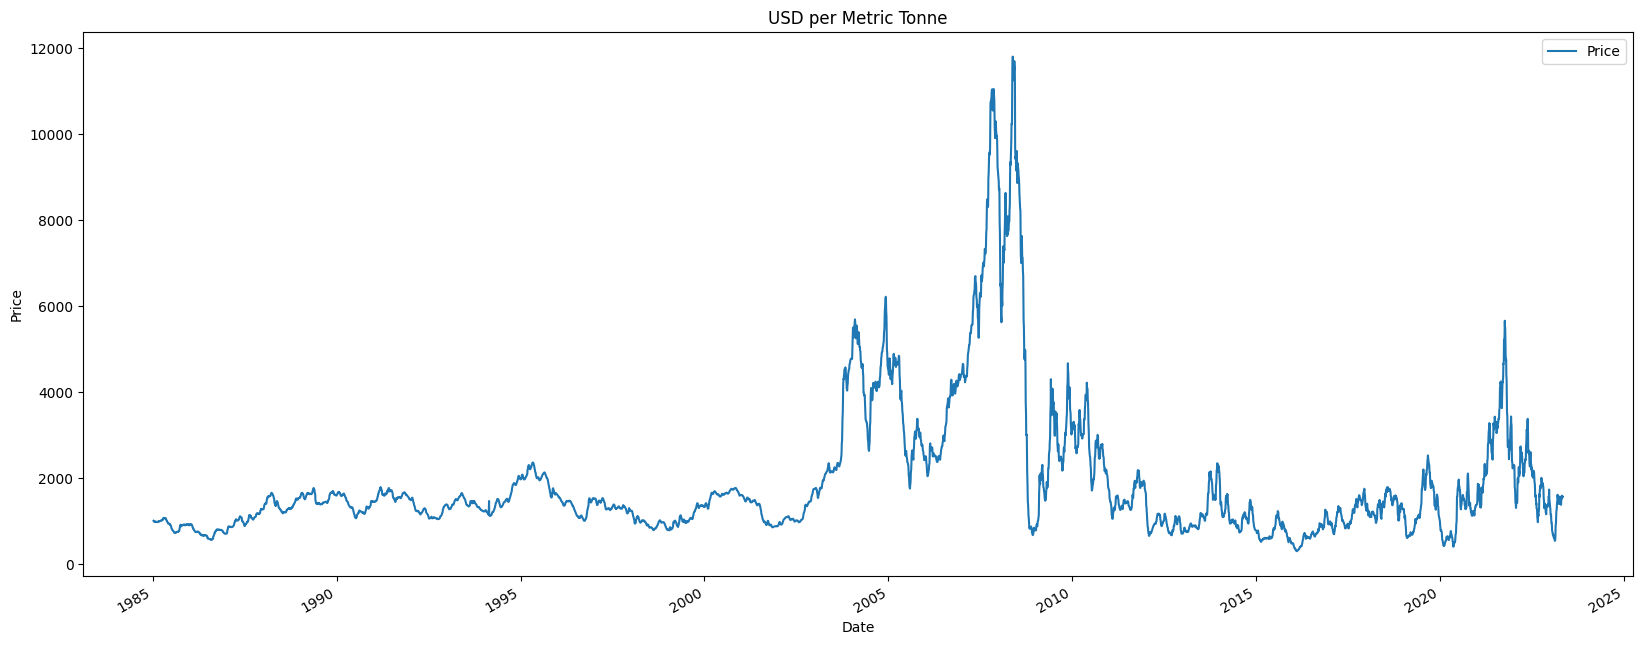

In [49]:
plotgraph(DBI,'Date','Price')

In [50]:
# Plotly line plot
fig = go.Figure(data=[go.Scatter(x=DBI['Date'], y=DBI['Price'])])
fig.show()
